In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/jarif87/DataSets/main/Heart_Disease.csv")

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.shape

(319795, 18)

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
df["Smoking"].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

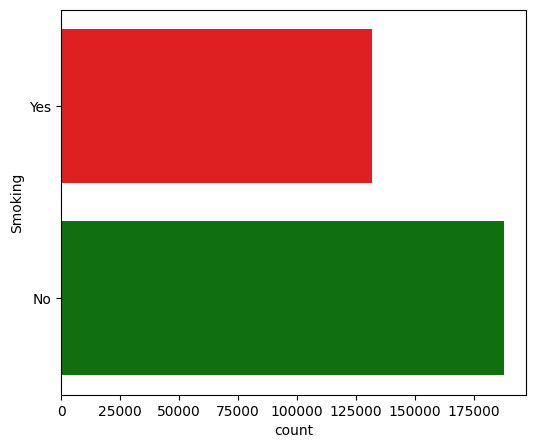

In [10]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,y="Smoking",palette=["red","green"])
plt.show()

In [11]:
df["Race"].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

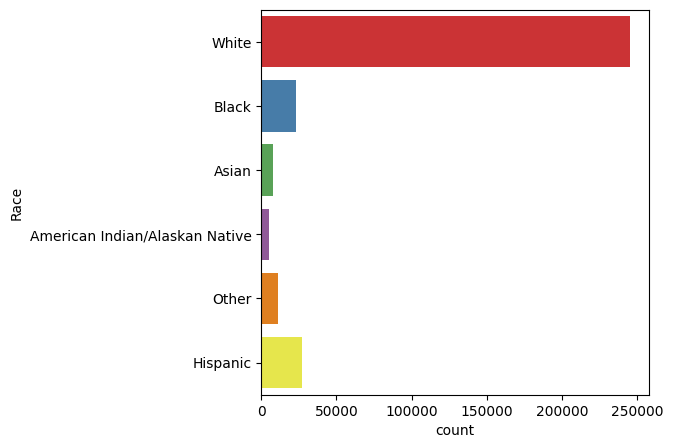

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,y="Race",palette="Set1")
plt.show()

In [13]:
df["AlcoholDrinking"].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

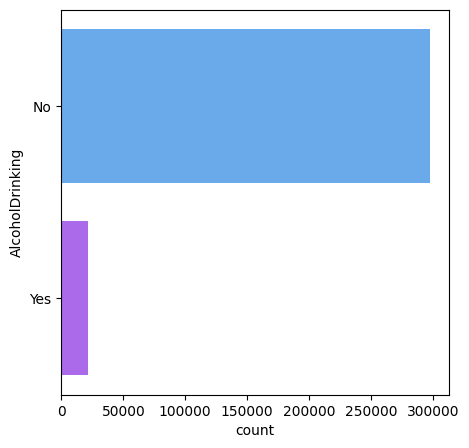

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,y="AlcoholDrinking",palette="cool")
plt.show()

In [15]:
df["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

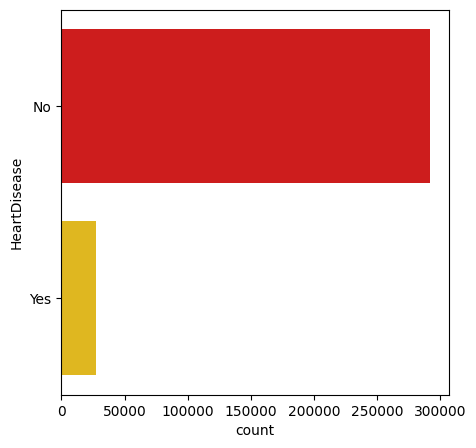

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,y="HeartDisease",palette="hot")
plt.show()

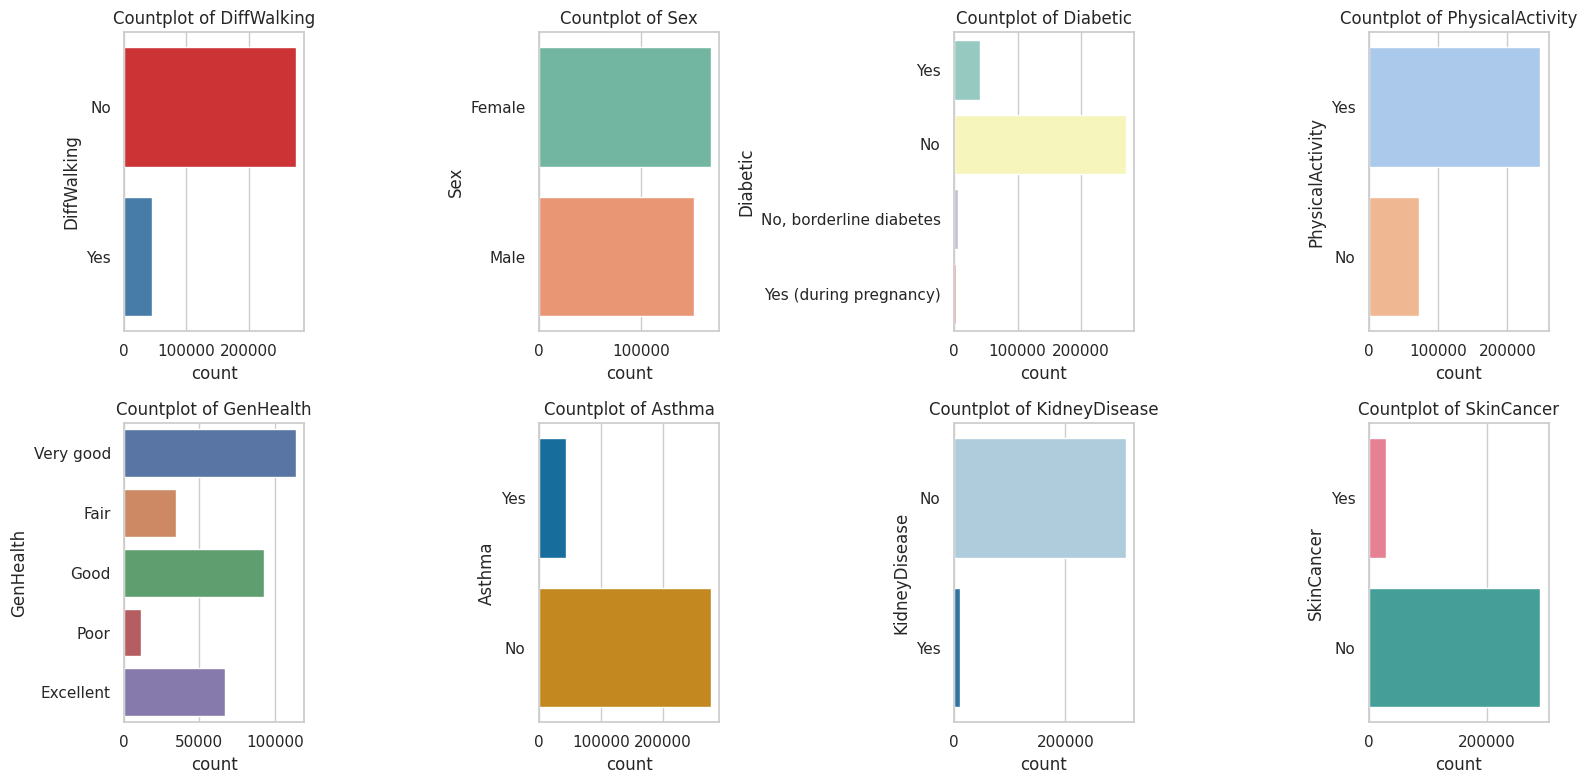

In [17]:

columns = ['DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
           'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
palettes = ['Set1', 'Set2', 'Set3', 'pastel', 'deep', 'colorblind', 'Paired', 'husl']

sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes = axes.flatten()
for i, (col, palette) in enumerate(zip(columns, palettes)):
    sns.countplot(y=col, data=df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['HeartDisease',"PhysicalActivity", 'Smoking', 'AlcoholDrinking', 'Stroke',
                        'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
                        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


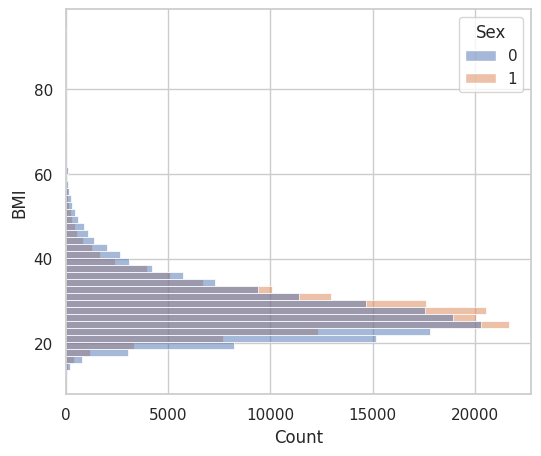

In [19]:
plt.figure(figsize=(6,5))
sns.histplot(data=df, y="BMI",hue="Sex",bins=50)
plt.show()

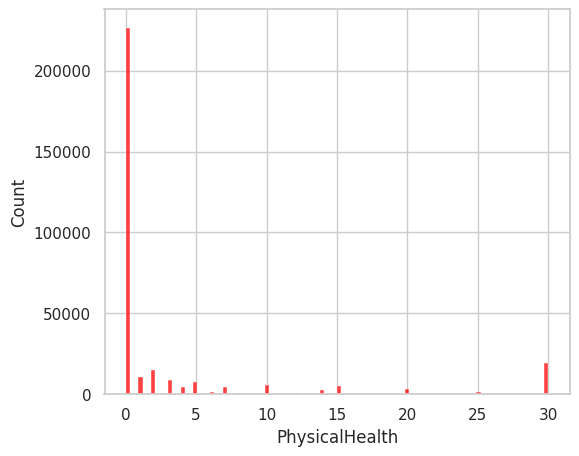

In [20]:
plt.figure(figsize=(6,5))
sns.histplot(data=df, x="PhysicalHealth",bins=100,color="red")
plt.show()

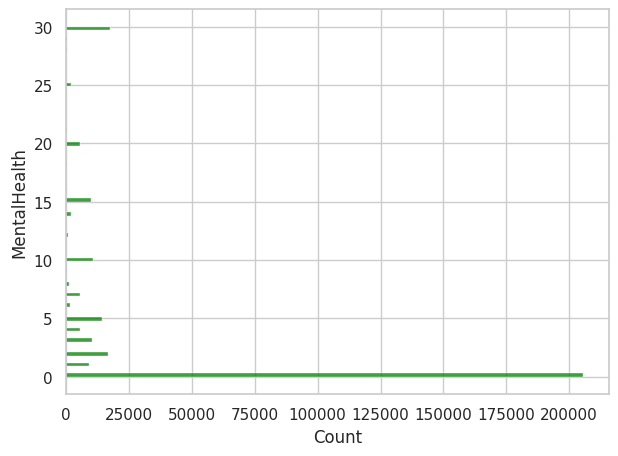

In [21]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, y="MentalHealth",bins=100,color="green")
plt.show()

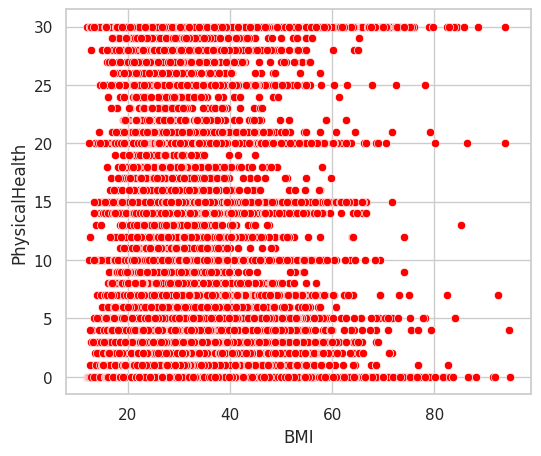

In [22]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="BMI", y="PhysicalHealth",color="red")
plt.show()

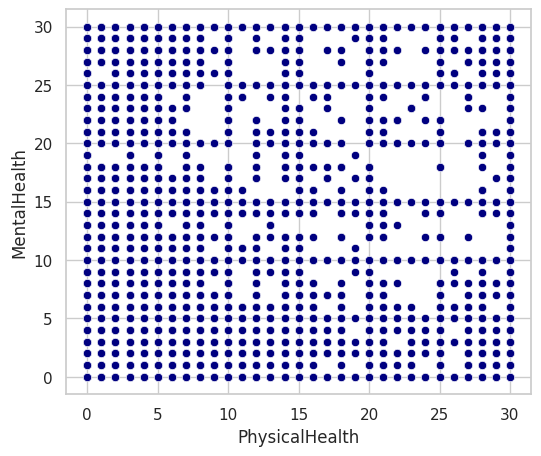

In [23]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="PhysicalHealth", y="MentalHealth",color="navy")
plt.show()

In [24]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
first_model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=10,
                                 random_state=42)

In [27]:
first_model.fit(X_train,y_train)
pred0=first_model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test,pred0)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


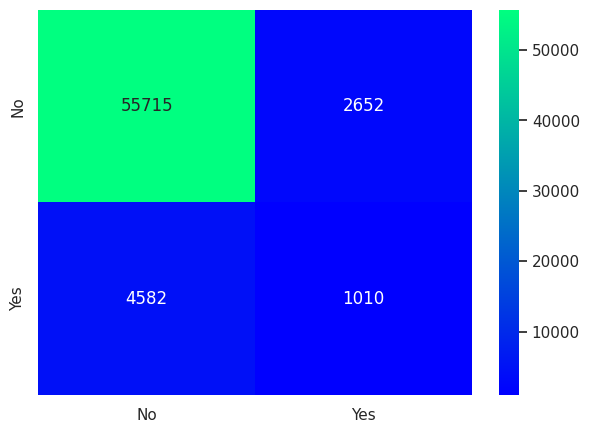

In [29]:
plt.figure(figsize=(7,5))
label_name=["No","Yes"]
conf_matrix = confusion_matrix(y_test, pred0)
sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name
            ,cmap="winter")
plt.show()

In [30]:
print(classification_report(y_test,pred0,target_names=label_name))

              precision    recall  f1-score   support

          No       0.92      0.95      0.94     58367
         Yes       0.28      0.18      0.22      5592

    accuracy                           0.89     63959
   macro avg       0.60      0.57      0.58     63959
weighted avg       0.87      0.89      0.88     63959



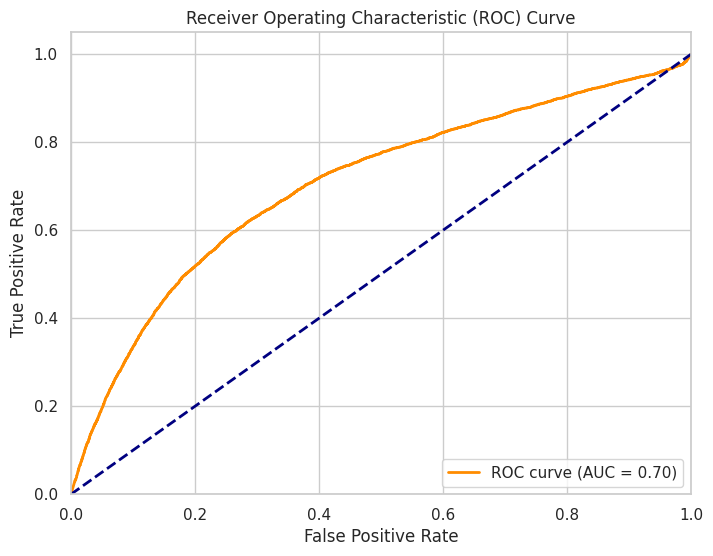

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = first_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [32]:
data={"True_Data":y_test,"Test_Data":pred0}
new=pd.DataFrame(data)
new.head(20)

,True_Data,Test_Data
271884,0,0
270361,0,0
219060,0,0
24010,0,0
181930,0,1
24149,1,0
185683,0,0
316656,0,0
305719,0,0
56786,0,0


# Log Loss

In [33]:
from sklearn.metrics import log_loss
loss = log_loss(y_test,pred0)
print(f'Log Loss: {loss:.4f}')

Log Loss: 4.0767


# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
sec_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [35]:
sec_model.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
pred1=sec_model.predict(X_test)

In [37]:
accuracy1 = accuracy_score(y_test,pred1)
print(f'Accuracy: {accuracy1:.2f}')

Accuracy: 0.91


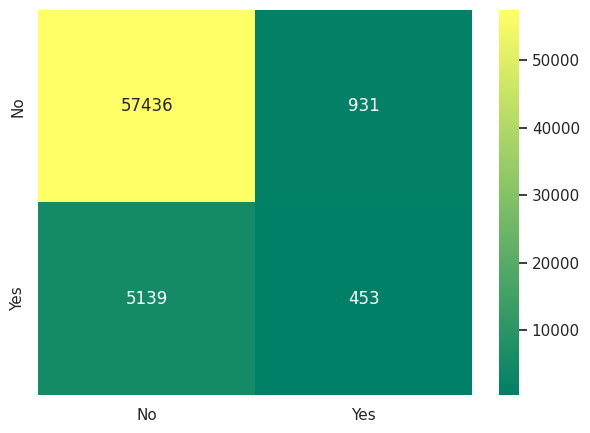

In [38]:
plt.figure(figsize=(7,5))
label_name=["No","Yes"]
conf_matrix1 = confusion_matrix(y_test, pred1)
sns.heatmap(conf_matrix1,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name
            ,cmap="summer")
plt.show()

In [39]:
print(classification_report(y_test,pred1,target_names=label_name))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95     58367
         Yes       0.33      0.08      0.13      5592

    accuracy                           0.91     63959
   macro avg       0.62      0.53      0.54     63959
weighted avg       0.87      0.91      0.88     63959



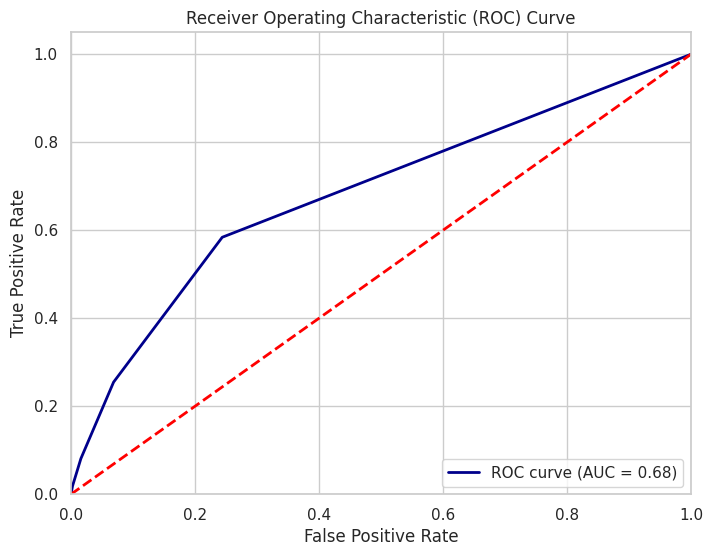

In [40]:

y_pred_prob1 = sec_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob1)
roc_auc0 = roc_auc_score(y_test, y_pred_prob1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [41]:
from sklearn.metrics import log_loss
loss0 = log_loss(y_test,pred1)
print(f'Log Loss: {loss0:.4f}')

Log Loss: 3.4207


In [42]:
from sklearn.ensemble import RandomForestClassifier
third_model=RandomForestClassifier(max_depth=5, random_state=42)

In [43]:
third_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [44]:
pred2=third_model.predict(X_test)
accuracy2 = accuracy_score(y_test,pred2)
print(f'Accuracy: {accuracy2:.2f}')

Accuracy: 0.91


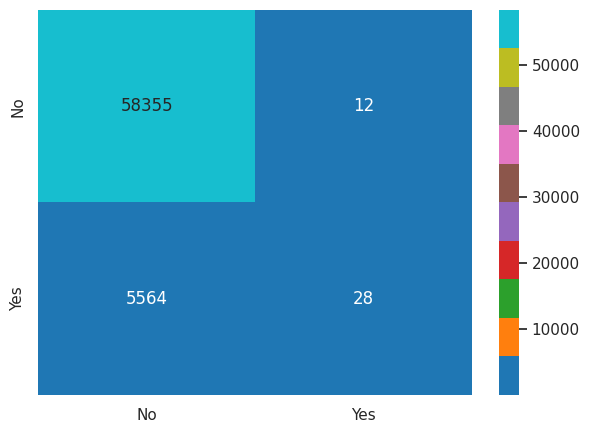

In [45]:
plt.figure(figsize=(7,5))
label_name=["No","Yes"]
conf_matrix2 = confusion_matrix(y_test, pred2)
sns.heatmap(conf_matrix2,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name
            ,cmap="tab10")
plt.show()

In [46]:
print(classification_report(y_test,pred2,target_names=label_name))

              precision    recall  f1-score   support

          No       0.91      1.00      0.95     58367
         Yes       0.70      0.01      0.01      5592

    accuracy                           0.91     63959
   macro avg       0.81      0.50      0.48     63959
weighted avg       0.89      0.91      0.87     63959



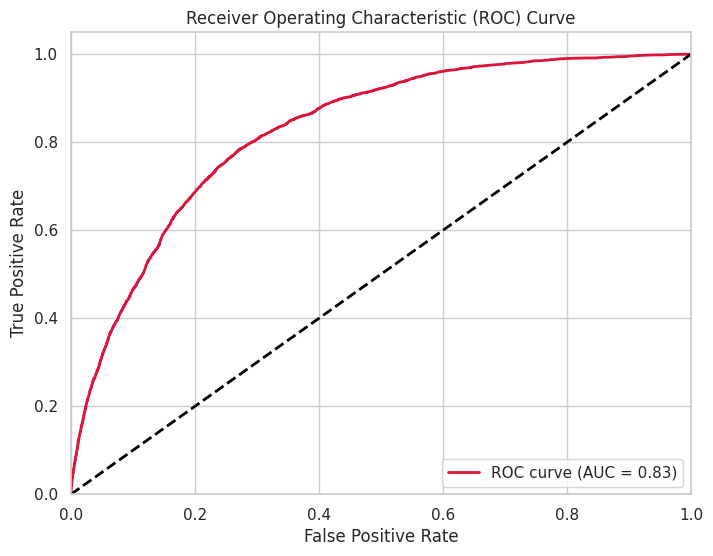

In [47]:

y_pred_prob2 = third_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)
roc_auc0 = roc_auc_score(y_test, y_pred_prob2)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='crimson', lw=2, label=f'ROC curve (AUC = {roc_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
loss2= log_loss(y_test,pred2)
print(f'Log Loss: {loss2:.4f}')

Log Loss: 3.1423


# Compare Model Accuracy

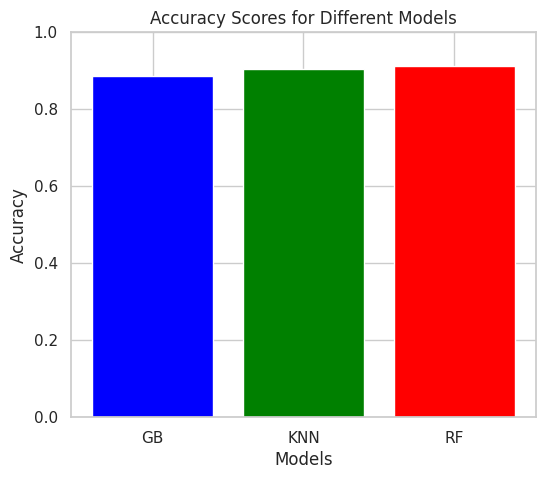

In [49]:
models = ['GB', 'KNN', 'RF']
accuracy_scores = [accuracy, accuracy1, accuracy2]

plt.figure(figsize=(6,5))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)
plt.show()


#  Compare Models Loss

In [50]:
models_loss = ['GB_Loss', 'KNN_Loss', 'RF_Loss']
loss_scores = [loss, loss0, loss2]
df_loss = pd.DataFrame({'Models': models_loss, 'Loss': loss_scores})
df_loss



,Models,Loss
0,GB_Loss,4.076671
1,KNN_Loss,3.420707
2,RF_Loss,3.142316
